# 다나와 무선청소기 검색 

In [3]:
import pandas as pd 
from selenium import webdriver
from bs4 import BeautifulSoup
driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe') 

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_19508/8801891.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe')


### 다나와 무선청소기 검색 페이지

In [2]:
url = 'http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain'
driver.get(url)

### 무선청소기 정보 수집   
: 각 상품별 스펙 및 가격

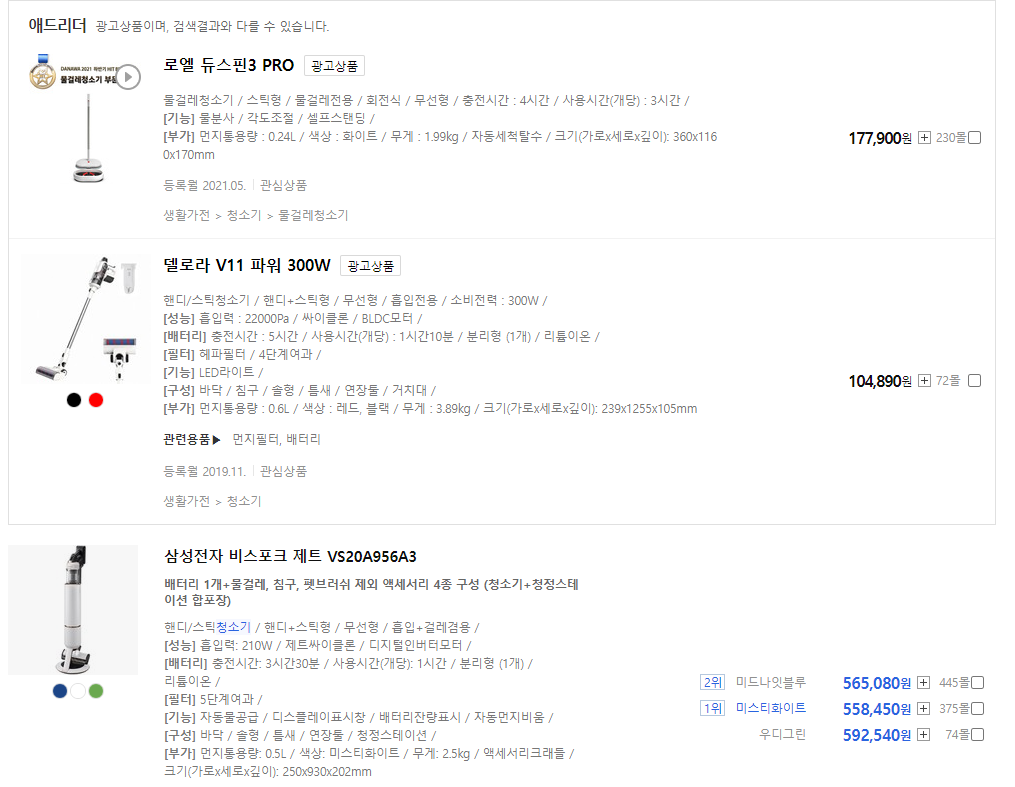

### 첫 페이지 정보 수집

* 각 상품 정보는 ul.product_list > li.prod_item

In [3]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# 광고 제외 44개 
prod_items =soup.select('div.main_prodlist.main_prodlist_list >ul.product_list > li.prod_item')
print(len(prod_items))

44


* 상품 정보 수집

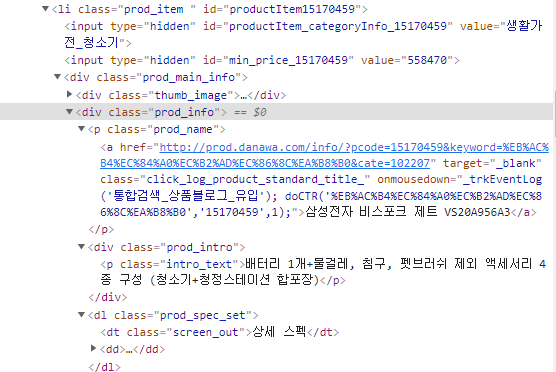

In [9]:
# 상품명 
title = prod_items[0].select('p.prod_name > a')[0].text.strip()
title

'삼성전자 비스포크 제트 VS20A956A3'

* 스펙 목록 : div.spec_list > a 

In [12]:
spec_list =prod_items[0].select('div.spec_list')[0].text.strip()
spec_list

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm'

* 가격정보 : div.prod_pricelist > li.rank_one > p.price_sect > a > strong 

In [18]:
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',' , "")
# 단위 구분 x .replace(',', "")
price

'558470'

#### 반복문 통해서 페이지 내의 상품들 정보 수집

: 상품명 ,스펙, 가격 각각 오류가 발생할 수 있으니 try excep 구문 

In [20]:
prod_data = []

for prod_item in prod_items :  # prod_item = 상품 1개 정보
    try : 
        title = prod_item.select('p.prod_name > a')[0].text.strip()
    except : 
        title = ""
    try :
        spec_list =prod_item.select('div.spec_list')[0].text.strip()
    except:
        spec_list =""
    try:
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',' , "")
    except: 
        price = 0
        
    prod_data.append([title, spec_list , price])
    

In [21]:
len(prod_data)

44

In [22]:
prod_data[0]

['삼성전자 비스포크 제트 VS20A956A3',
 '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
 '558470']

* 한 페이지의 정보를 수집하는 크롤링 함수로 구현 

In [23]:
def get_prod_items(prod_items): 
    prod_data = []

    for prod_item in prod_items :  # prod_item = 상품 1개 정보
        try : 
            title = prod_item.select('p.prod_name > a')[0].text.strip()
        except : 
            title = ""
        try :
            spec_list =prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list =""
        try:
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',' , "")
        except: 
            price = 0
        
        prod_data.append([title, spec_list , price])
    
    return prod_data

In [26]:
prod_items =soup.select('div.main_prodlist.main_prodlist_list >ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
prod_data[-1]

['삼성전자 비스포크 제트 VS20A957D2',
 '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 솔형 / 틈새 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
 '721790']

### 전체 페이지 데이터 수집
#### 검색 URL을 확인해보라 

* 1page : http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain
* 2page : 'http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2636&defaultVaTab=350545&tab=goods
* 3page : http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=3&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2636&defaultVaTab=350545&tab=goods

: query = '무선청소기' , page = n

* 다나와 검색 url 만들어 주는 함수 

In [29]:
def get_search_page_url(keyword, page) :
    return 'http://search.danawa.com/dsearch.php?query={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods'.format(keyword, page)

In [31]:
keyword = '냉장고'
page =4
url = get_search_page_url(keyword, page)
print(url)

http://search.danawa.com/dsearch.php?query=냉장고&volumeType=allvs&page=4&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods


#### 주피터 노트북의 진행 표시줄 처리  : tqdm

In [32]:
!pip install tqdm

In [33]:
import time 
from tqdm import tqdm_notebook 

total_page = 10 
for page in tqdm_notebook(range(1,total_page +1)):
    # 페이지가 로딩완료 되기 위한 시간을 5초로 준다 .
    time.sleep(5)

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_13932/548915128.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1,total_page +1)):


  0%|          | 0/10 [00:00<?, ?it/s]

### 여러 페이지에 걸친 상품 정보 수집 ! 

* 페이지 검색 seach_page(검색명, 1)
* 크롤링 수행 get_prod_item -> 페이지 결과가 prod_data 리스트에 
* 다음 페이지 검색 
* 중간에 모든 페이지 결과를 저장하는 리스트 필요 

In [1]:
from selenium import webdriver 
import time 
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

# 웹 드라이버 
driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe') 
driver.implicitly_wait(3)

keyword = '무선청소기'
total_page = 10 
prod_data_total = [] # 전체 페이지 상품목록을 담을 리스트 

# 진행정보 tqdm 적용 
for page in tqdm_notebook(range(1, total_page+1)):
    # 1. 페이지 검색 
    url = get_search_page_url(keyword, page)
    driver.get(url)
    time.sleep(5) # 페이지 로드 시간 
    
    # 2. 크롤링 수행 
    html = driver.page_source # 현재 페이지 소스정보 
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items =soup.select('div.main_prodlist.main_prodlist_list >ul.product_list > li.prod_item')
    prod_item_list =get_prod_items(prod_items) # prod_data
        
    # 페이지 검색 결과 리스트를 전체 결과 리스트에 추가 
    prod_data_total = prod_data_total + prod_item_list
    # append로 하면 원소 10개 , 원소 1개당 페이지 1개 이중리스트 

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_19508/2094849071.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('c:/Users/SAMSUNG/chromedriver_win32/chromedriver.exe')
C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_19508/2094849071.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

NameError: name 'get_search_page_url' is not defined

In [56]:
len(prod_data_total)

440

In [57]:
prod_data_total[0:2]

[['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '558440'],
 ['1two1SZ3sq', '1two1SZ3sq456597', '456597']]

* 수집 데이터 저장 

In [55]:
data =pd.DataFrame(prod_data_total,
                  columns =['상품명','스펙 목록','가격'])
data.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/danawa_crawling_result.xlsx', index =False)

### 데이터 전처리 과정

In [4]:
data = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/danawa_crawling_result.xlsx')

In [8]:
data.head(10)

,상품명,스펙 목록,가격
0,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,558440
1,1two1SZ3sq,1two1SZ3sq456597,456597
2,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",60450
3,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1068440
4,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",49310
5,샤오미 미지아 차량용 핸디 무선 청소기,"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",36450
7,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,791610
8,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / 소비전력: 450W / ...,154990
9,다이슨 V10 플러피 오리진,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 흡입력: 151...,498800
10,LG전자 코드제로 ThinQ A9S AS9470,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,816260


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      440 non-null    object
dtypes: object(3)
memory usage: 10.4+ KB


In [64]:
data['상품명'][:10]

0                   삼성전자 비스포크 제트 VS20A956A3
1                                1two1SZ3sq
2     샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)
3         LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571
4                   베이스어스 차량용 청소기 A3 (해외구매)
5                     샤오미 미지아 차량용 핸디 무선 청소기
7             LG전자 코드제로 ThinQ A9S AS9370IKT
8                               샤오미 드리미 V10
9                           다이슨 V10 플러피 오리진
10               LG전자 코드제로 ThinQ A9S AS9470
Name: 상품명, dtype: object

* 누락 데이터를 제거함

In [7]:
data = data[data['가격'] != 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      410 non-null    object
dtypes: object(3)
memory usage: 12.8+ KB


In [23]:
data[data['상품명'].str.contains(" ") == False]

,상품명,스펙 목록,가격
1,1two1SZ3sq,1two1SZ3sq456597,456597
48,7SIv8bBaCG,7SIv8bBaCG584472,584472
90,BhzePWewUt,BhzePWewUt533825,533825
136,6gm8WgruwP,6gm8WgruwP248503,248503
177,4PhViUEiuX,4PhViUEiuX904701,904701
224,hjRHkX8VH2,hjRHkX8VH2822844,822844
267,d3XibtBnMc,d3XibtBnMc306988,306988
310,HBoiUsrB11,HBoiUsrB1176246,76246
353,o9veJaKBVF,o9veJaKBVF755586,755586
397,E96xUEByWs,E96xUEByWs922380,922380


In [24]:
data = data[data['상품명'].str.contains(" ")]

#### 상품명에서 회사명과 모델명을 분리 
: 삼성전자/ 비스포크 제트 vs201~ 

In [25]:
title = "삼성전자 비스포크 제트 VS20A956A3"
info = title.split(' ', 1) # split(separator , max)
info

['삼성전자', '비스포크 제트 VS20A956A3']

In [26]:
company_list = []
product_list = []
for title in data['상품명'] : 
    info =  title.split(' ',1)
    company_name = info[0]
    product_name = info[1]
    
    company_list.append(company_name)
    product_list.append(product_name)

In [27]:
company_list[:5]

['삼성전자', '샤오미', 'LG전자', '베이스어스', '샤오미']

In [28]:
product_list[:5]

['비스포크 제트 VS20A956A3',
 'CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)',
 '오브제컬렉션 코드제로 ThinQ A9S AO9571',
 '차량용 청소기 A3 (해외구매)',
 '미지아 차량용 핸디 무선 청소기']

In [37]:
len(company_list) , len(product_list)

(400, 400)

#### 스펙 목록을 분리 

In [30]:
data['스펙 목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm'

In [32]:
# split(" /") 공백 포함한 슬래시로 구분

data['스펙 목록'][0].split(" /")

['핸디/스틱청소기',
 ' 핸디+스틱형',
 ' 무선형',
 ' 흡입+걸레겸용',
 ' [성능] 흡입력: 210W',
 ' 제트싸이클론',
 ' 디지털인버터모터',
 ' [배터리] 충전시간: 3시간30분',
 ' 사용시간(개당): 1시간',
 ' 분리형 (1개)',
 ' 리튬이온',
 ' [필터] 5단계여과',
 ' [기능] 자동물공급',
 ' 디스플레이표시창',
 ' 배터리잔량표시',
 ' 자동먼지비움',
 ' [구성] 바닥',
 ' 솔형',
 ' 틈새',
 ' 연장툴',
 ' 청정스테이션',
 ' [부가] 먼지통용량: 0.5L',
 ' 색상: 미스티화이트',
 ' 무게: 2.5kg',
 ' 액세서리크래들 ',
 ' 크기(가로x세로x깊이): 250x930x202mm']

In [33]:
data['스펙 목록'][2].split(" /")

['차량용청소기',
 ' 무선',
 ' 흡입력: 16,800Pa',
 ' 최대출력: 120W',
 ' 헤파필터',
 ' 스테인리스 필터',
 ' 추가노즐: 틈새, 솔브러쉬, 연장호스',
 ' 사용시간: 30분',
 ' 소음: 73.8dB',
 ' 충전방식: USB C타입',
 ' 배터리용량: 2,000mAh',
 ' 색상: 블랙, 화이트',
 ' 크기: 369x72mm',
 ' 무게: 560g']

#### 스펙 목록에서 필요한 정보만 추출   
 * 카테고리 - 맨 처음 등장 
 * 사용시간 - 사용시간 : 1시간
 * 흡입력 - 흡입력 : 210W

In [34]:
spec_list =data['스펙 목록'][0].split(" /")
category = spec_list[0]
category

'핸디/스틱청소기'

In [35]:
# 사용시간과 흡입력 : '문자열 내에 포함 ? '
for spec in spec_list: 
    if '사용시간' in spec :
        user_time_spec = spec
    elif '흡입력' in spec : 
        suction_spec = spec


In [36]:
user_time_spec, suction_spec

(' 사용시간(개당): 1시간', ' [성능] 흡입력: 210W')

In [84]:
# 정량적인 데이터만 추출 
user_time_value = user_time_spec.split(": ")[1].strip()
print(user_time_value)
suction_value = suction_spec.split(": ")[1].strip()
print(suction_value)

1시간
210W


In [115]:
category_list = []
usertime_list = []
suction_list = []

for spec_data in data['스펙 목록'] : # 한상품의 스펙목록
    spec_list = spec_data.split(" /") # 스펙 목록을 ,로 구분 

    category = spec_list[0]            
    category_list.append(category)
    
    # 사용시간과 흡입력 정보 
    # 사용시간과 흡입력 정보가 없는 상품 존재 가능 -> 빈 변수를 생성
    user_time_value = None
    suction_value = None
    
    for spec in spec_list :    # 개별 스펙
        if '사용시간' in spec :
            user_time_value = spec.split(": ")[1].strip()
        elif '흡입력' in spec : 
            suction_value = spec.split(": ")[1].strip()
        
    usertime_list.append(user_time_value)
    suction_list.append(suction_value)

* 내용확인

In [116]:
category_list[:5]

['핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기', '차량용청소기', '차량용청소기']

In [117]:
usertime_list[:5]

['1시간', '30분', '1시간', '45분', '9~30분']

In [118]:
suction_list[:5]

['210W', '16,800Pa', '210W', '15,000Pa', '13,000Pa']

In [119]:
len(category_list), len(usertime_list),len(suction_list)

(400, 400, 400)

#### 무선 청소기의 사용시간 단위를 통일 (시간 & 분)

In [120]:
usertime_list 

['1시간',
 '30분',
 '1시간',
 '45분',
 '9~30분',
 '1시간',
 '1시간',
 '1시간',
 '1시간',
 '45분',
 '1시간',
 None,
 '1시간',
 '1시간',
 '9~30분',
 '20분',
 '1시간',
 '1시간',
 '48분',
 '1시간',
 '1시간',
 '1시간',
 '25분',
 '40분',
 None,
 '1시간',
 '50분',
 '20분',
 '48분',
 '20~28분',
 '1시간',
 '30분',
 '1시간',
 '1시간',
 '1시간',
 '30분',
 None,
 '40분',
 '20분',
 '1시간',
 '12분(고속),25분(저속)',
 '30분',
 '1시간10분',
 '20분',
 None,
 '1시간30분',
 '40분',
 '17분',
 '50분',
 '48~60분',
 '15~28분',
 '3시간',
 '1시간',
 '1시간',
 '1시간',
 '35분',
 '1시간',
 '1시간30분',
 '1시간',
 '48~60분',
 '30분',
 '53분',
 '1시간',
 '12분',
 '30분',
 '1시간',
 '1시간20분',
 None,
 '1시간',
 '15분',
 '50분',
 '40분',
 '1시간',
 '1시간',
 None,
 '12~20분',
 '1시간',
 '12분',
 '30분',
 '35분',
 '50분',
 '35분',
 '28분',
 '1시간',
 '45분',
 '1시간',
 '20분',
 None,
 '13분',
 '40분',
 '13분',
 None,
 '45분',
 '18분',
 '25분',
 '40분',
 '53분',
 '최대 25분',
 '1시간',
 '30분',
 '35분',
 '20분',
 '1시간',
 '2시간',
 '1시간',
 '50분',
 '50분',
 '1시간',
 '30분',
 '1시간',
 '42분',
 '60분',
 '50분',
 '45분',
 '42분',
 '1시간',
 None,
 '40분',
 '48분',
 '53분',
 '5

: 시간 , 분 표기 or 10~ 30분 , None 등 예외

* 시간 -> 분으로 표기 
1. 시간 단어 o   
    1) 시간 앞의 단어 추출 , * 60 = 분 
    2) 시간 + 분 -> 분 앞의 숫자를 추출해 사용시간에 더함 
2. 시간 단어 x 
    1) 분 글자 앞의 숫자를 추출 
3. 예외 

In [125]:
def convert_time_min(time) :
    try: 
        if '시간' in time : # 1시간
            hour = time.split('시간')[0]
            if '분' in time : # 1시간30분
                minute = time.split('시간')[-1].split('분')[0]
            else : 
                minute= 0
        else: # 시간 x
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except :
        return None  # 예외


In [126]:
# 테스트 
times = ['30분', '1시간 20분', '4분', '10~20분', '2시간 10분']
for time in times: 
    time_value = convert_time_min(time)
    print(time , '=' ,time_value)

30분 = 30
1시간 20분 = 80
4분 = 4
10~20분 = None
2시간 10분 = 130


In [128]:
# 모델별 사용시간을 분 단위로 통일 
new_use_time_list =[]
for time in usertime_list :
    time_value = convert_time_min(time)
    new_use_time_list.append(time_value)

In [132]:
print(new_use_time_list[:10])
print(len(new_use_time_list))

[60, 30, 60, 45, None, 60, 60, 60, 60, 45]
400


#### 무선 청소기의 흡입력 단위를 통일 (W, AW , Pa)
대략 1W = 1AW = 100Pa

In [133]:
suction_list

['210W',
 '16,800Pa',
 '210W',
 '15,000Pa',
 '13,000Pa',
 '200W',
 '22000Pa',
 '151AW',
 '200W',
 None,
 '210W',
 '5,500Pa',
 '210W',
 '20000Pa',
 '13,000Pa',
 '5,500Pa',
 '200W',
 '210W',
 '29000Pa',
 '210W',
 '210W',
 None,
 '16,800Pa',
 '100AW',
 '~7,000Pa',
 '240AW',
 '140W',
 '8,000Pa',
 None,
 '8,000Pa',
 '210W',
 '12,000Pa',
 '210W',
 '150W',
 '150AW',
 '7,000Pa',
 None,
 '150W',
 '5,200Pa',
 '210W',
 '13,000Pa',
 '5,000Pa',
 '22000Pa',
 None,
 '5,500Pa',
 '27000Pa',
 '140W',
 '12,000Pa',
 '140W',
 None,
 '15,000Pa',
 None,
 '210W',
 '200W',
 '200W',
 None,
 '210W',
 '25000Pa',
 '200W',
 None,
 None,
 None,
 None,
 None,
 None,
 '150AW',
 None,
 None,
 '210W',
 None,
 None,
 '8,000Pa',
 '200W',
 '240AW',
 '10,000Pa',
 '6,000Pa',
 '200W',
 None,
 '17000Pa',
 '23000Pa',
 None,
 None,
 '15000Pa',
 '22000Pa',
 None,
 '210W',
 '60W',
 '8,000Pa',
 '10,000Pa',
 '26000Pa',
 '30AW',
 None,
 None,
 '5,000Pa',
 '4,800Pa',
 '150W',
 None,
 '최대 9,000Pa',
 '210W',
 None,
 None,
 '50AW',
 '210

*  흡입력 통일 AW로 
1. 대소문자 통일 .upper()
2. 흡입력에 "W" or "AW" 글자가 있으면 , 단위를 삭제후 숫자형 int() 변환 
3. 흡입력에 'PA' 글자  있으면 , 단위 삭제후 정수전환 -> 100으로 나눔.
4. 흡입력 None or 단위 변환 에러시 예외처리 

In [179]:
def get_suction(value) : # value에 suction이 인자로 들어올것
    try : 
        value = value.upper()
        if "AW" in value or "W" in value : 
            result = value.replace("A" ,  "").replace("W", "")
            result = int(result.replace(',', ""))
        elif "PA" in value :
            result = value.replace('PA', "")
            result = int(result.replace(',', ''))/100
        else :
            result = None 
        return result
    except : 
        return None 

In [180]:
# 테스트 
suction = ['100W', '10,000pa', '10AW']
for power in suction: 
    value = get_suction(power)
    print(power , value)

100W 100
10,000pa 100.0
10AW 10


In [181]:
# 흡입력 단위 통일 - W
new_suction_list=[]
for power in suction_list :
    value = get_suction(power)
    new_suction_list.append(value)

In [183]:
len(new_suction_list)

400

### 카테고리 ,상품명, 사용시간 ,흡입력 데이터가 저장된 df 생성

In [218]:
pd_data = pd.DataFrame({'카테고리' : category_list,
                       '회사명' : company_list, 
                       '제품명' : product_list, 
                       '가격' : data['가격'],
                       '사용시간' : new_use_time_list,
                       '흡입력' : new_suction_list}).reset_index(drop =True)

In [219]:
pd_data.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,558440,60.0,210.0
1,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),60450,30.0,168.0
2,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1068440,60.0,210.0
3,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),49310,45.0,150.0
4,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기,36450,NaN,130.0


In [224]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    400 non-null    object 
 1   회사명     400 non-null    object 
 2   제품명     400 non-null    object 
 3   가격      400 non-null    float64
 4   사용시간    357 non-null    float64
 5   흡입력     243 non-null    float64
dtypes: float64(3), object(3)
memory usage: 18.9+ KB


In [222]:
pd_data['가격'].replace('일시품절', 0,inplace =True)

In [223]:
pd_data['가격'] = pd_data['가격'].astype('float')

In [226]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기        278
차량용청소기           74
물걸레청소기           30
욕실청소기             9
침구청소기             3
업소용청소기            2
진공청소기             2
물걸레청소기+스팀청소기      1
차량용선풍기            1
Name: 카테고리, dtype: int64

In [227]:
pd_data['회사명'].value_counts()

삼성전자      49
일렉트로룩스    38
샤오미       35
LG전자      33
다이슨       20
          ..
청연MnS      1
신일         1
미닛츠        1
로얄민스터      1
이마트        1
Name: 회사명, Length: 126, dtype: int64

In [228]:
pd_data.mean()

C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_19508/4025385397.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd_data.mean()


가격      292426.455000
사용시간        44.196078
흡입력        153.456790
dtype: float64

In [231]:
# 엑셀 파일로 저장 
pd_data.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/danawa_data.xlsx', index =False)
# index = False 인덱스 따로 엑셀에 지정 x 

* 카테고리 : '핸디/스틱청소기' 추출 분석

In [229]:
pd_data_final = pd_data[pd_data['카테고리'] == '핸디/스틱청소기']
len(pd_data_final)

278

In [230]:
# 엑셀 파일로 저장 
pd_data_final.to_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/danawa_data_final.xlsx', index =False)
# index = False 인덱스 따로 엑셀에 지정 x 

In [233]:
danawa_data = pd.read_excel('C:/Users/SAMSUNG/Desktop/파이썬 데이터 분석/데이터 분석 실무 파이썬/danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,558440,60.0,210.0
1,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1068440,60.0,210.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,791610,60.0,200.0
3,핸디/스틱청소기,샤오미,드리미 V10,154990,60.0,220.0
4,핸디/스틱청소기,다이슨,V10 플러피 오리진,498800,60.0,151.0


* 흡입력 / 사용시간 순 

In [251]:
# 흡입력
top_list = danawa_data.sort_values(by= '흡입력', ascending = False)
top_list.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
125,핸디/스틱청소기,비브르,스톰파워 V31000,235000,NaN,310.0
169,핸디/스틱청소기,아이닉,NEW i20,188000,50.0,300.0
193,핸디/스틱청소기,캐치웰,NEW F8,199000,25.0,290.0
12,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48.0,290.0
201,핸디/스틱청소기,샤오미,드리미 T30,399000,90.0,270.0


In [252]:
# 사용시간
top_list = danawa_data.sort_values(by= '사용시간', ascending = False)
top_list.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
35,핸디/스틱청소기,샤오미,드리미 V11,212580,90.0,250.0
201,핸디/스틱청소기,샤오미,드리미 T30,399000,90.0,270.0
28,핸디/스틱청소기,샤오미,드리미 V12,300120,90.0,270.0
219,핸디/스틱청소기,로보락,H7,449000,90.0,160.0
215,핸디/스틱청소기,샤오미,드리미 V12 프로,388967,85.0,270.0


In [255]:
# 흡입력 & 사용시간 top 
top_list = danawa_data.sort_values(by= ['사용시간','흡입력'], ascending = False)
top_list.head()
# 1기준 - 사용시간 , 2기준 - 흡입력 ( 사용시간 같을시 )

,카테고리,회사명,제품명,가격,사용시간,흡입력
28,핸디/스틱청소기,샤오미,드리미 V12,300120,90.0,270.0
201,핸디/스틱청소기,샤오미,드리미 T30,399000,90.0,270.0
35,핸디/스틱청소기,샤오미,드리미 V11,212580,90.0,250.0
219,핸디/스틱청소기,로보락,H7,449000,90.0,160.0
215,핸디/스틱청소기,샤오미,드리미 V12 프로,388967,85.0,270.0


#### 가성비 제품 ? -> 가격 & 흡입력 & 사용시간 

In [258]:
# 각 평균 
price_mean = danawa_data['가격'].mean()
suction_mean = danawa_data['흡입력'].mean()
usetime_mean = danawa_data['사용시간'].mean()

print('가격 평균 : ' , round(price_mean))
print('흡입력 평균 : ' , round(suction_mean))
print('사용시간 평균 :'  , round(usetime_mean))

가격 평균 :  374550
흡입력 평균 :  172
사용시간 평균 : 44


* 평균을 기준으로 제품 평가 

In [260]:
# 가성비 조건 : 가격 < 평균 , 흡입력 ,사용시간 > 평균
condition = (danawa_data['가격'] <= price_mean) & \
            (danawa_data['흡입력'] >= suction_mean) & \
            (danawa_data['사용시간'] >= usetime_mean)

In [262]:
good_item = danawa_data[condition]
good_item

,카테고리,회사명,제품명,가격,사용시간,흡입력
3,핸디/스틱청소기,샤오미,드리미 V10,154990,60.0,220.0
9,핸디/스틱청소기,샤오미,TROUVER POWER 11,107030,60.0,200.0
12,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48.0,290.0
26,핸디/스틱청소기,델로라,V11 파워 300W,104890,70.0,220.0
28,핸디/스틱청소기,샤오미,드리미 V12,300120,90.0,270.0
35,핸디/스틱청소기,샤오미,드리미 V11,212580,90.0,250.0
52,핸디/스틱청소기,샤오미,TROUVER POWER 12,185920,60.0,220.0
67,핸디/스틱청소기,DIBEA,X30,149000,50.0,250.0
72,핸디/스틱청소기,샤오미,드리미 V9,106920,60.0,200.0
80,핸디/스틱청소기,DIBEA,M24 MAX,139000,50.0,250.0


In [264]:
len(good_item)

28

In [266]:
good_item['회사명'].value_counts()

샤오미      13
DIBEA     9
캐치웰       2
델로라       1
아이룸       1
보아르       1
아이닉       1
Name: 회사명, dtype: int64

#### 회사별 제품 분포

In [256]:
danawa_data['회사명'].value_counts()

삼성전자         49
일렉트로룩스       38
LG전자         32
샤오미          20
다이슨          20
DIBEA        16
신일전자         11
테팔            9
블랙앤데커         6
아이룸           5
캐치웰           5
유니맥스          4
마끼다           3
한빛시스템         3
스위스밀리터리       2
홈마블           2
쿠쿠전자          2
보랄            2
앱코            2
홈플래닛          2
한경희생활과학       2
보만            2
툴앤툴           2
보쉬            2
샤크            2
스마트에버         1
고스            1
JDL           1
웨이드           1
대웅모닝컴         1
에이스전자         1
클래파           1
로보락           1
저스트원          1
플러스마이너스제로     1
듀플렉스          1
발뮤다           1
일럭스고          1
파나소닉          1
카렉스           1
지웰            1
루베크           1
레이나           1
아이닉           1
델로라           1
오토모           1
무궁화전자         1
로얄민스터         1
비트로캔디         1
인빅터스          1
기펠            1
블랙파인          1
비브르           1
비즈포비즈         1
에어메이드         1
오아            1
솔리스           1
보아르           1
노뉴            1
이마트           1
Name: 회사명, dtype: int64

#### 회사별 제품의 가격 사용시간 및  흡입력 평균

In [247]:
top5_company_danawa = danawa_data[danawa_data['회사명'].isin(['삼성전자', '일렉트로룩스', 'LG전자', '샤오미', '다이슨'])]

pd.pivot_table(top5_company_danawa,
              index = '회사명',
              values = ['가격', '사용시간' , '흡입력'],
              aggfunc = 'mean')

,가격,사용시간,흡입력
회사명,,,
LG전자,867836.875000,54.687500,190.000000
다이슨,779196.500000,46.500000,148.588235
삼성전자,622719.387755,52.489362,194.047619
샤오미,183640.350000,62.263158,218.157895
일렉트로룩스,226284.736842,45.552632,NaN


### 그래프 시각화 ! 

In [267]:
# 예제 7-40 라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 
# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우, macOS에 대해 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    
%matplotlib inline

* 누락치 존재하는 데이터 삭제 

In [271]:
chart_data =danawa_data.dropna(axis = 0  , how ='any')
chart_data.shape

(175, 6)

In [277]:
chart_data.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,558440,60.00000,210.00000
1,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1068440,60.00000,210.00000
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,791610,60.00000,200.00000
3,핸디/스틱청소기,샤오미,드리미 V10,154990,60.00000,220.00000
4,핸디/스틱청소기,다이슨,V10 플러피 오리진,498800,60.00000,151.00000


In [273]:
pd.options.display.float_format = '{:.5f}'.format

In [274]:
chart_data.describe()

,가격,사용시간,흡입력
count,175.00000,175.00000,175.00000
mean,474896.38286,47.98857,173.50286
std,381404.08822,16.76476,65.28381
min,0.00000,9.00000,25.00000
25%,135555.00000,35.00000,140.00000
50%,394470.00000,50.00000,200.00000
75%,794015.00000,60.00000,210.00000
max,1452610.00000,90.00000,300.00000


In [282]:
# 산점도 그래프에 범위 및 축 추가 하기 위한 정보 수집 
suction_max = chart_data['흡입력'].max()
suction_mean =chart_data['흡입력'].mean()
usetime_max = chart_data['사용시간'].max()
usetime_mean =chart_data['사용시간'].mean()

#### 버블 차트 그래프 x = 흡입력, y = 사용시간 

Text(0.5, 1.0, '핸디 /스틱 청소기 차트')

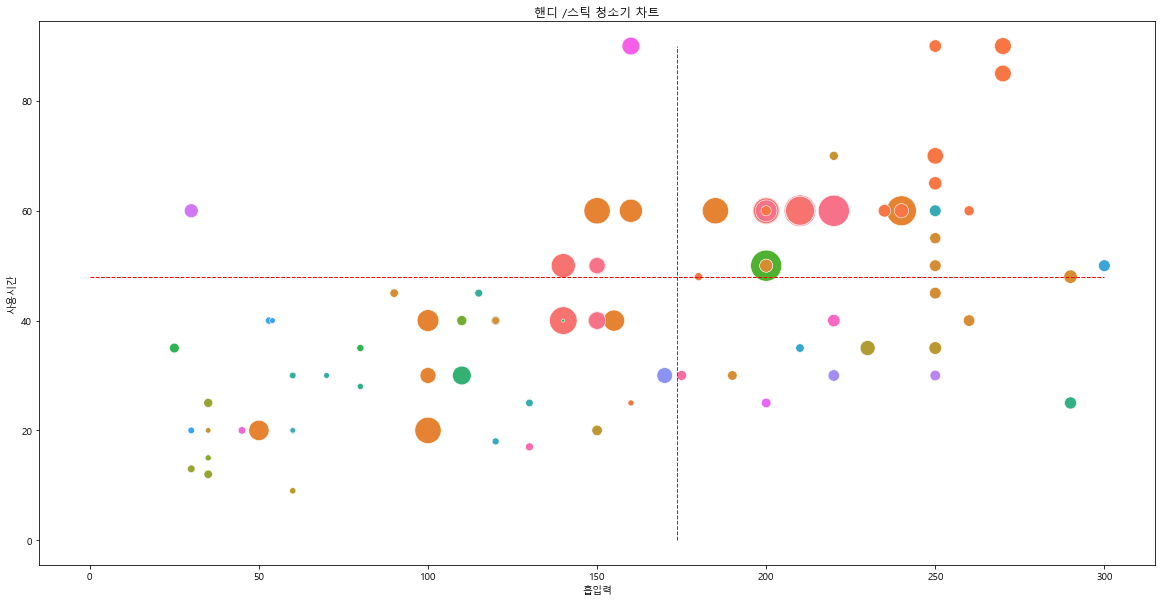

In [287]:
plt.figure(figsize= (20,10))
# 산점도 
sns.scatterplot(data = chart_data,
               x = '흡입력',
               y = '사용시간',
               size = '가격', # 점크기 옵션에 변수 추가 
               hue = '회사명',
               sizes = (10, 1000), # 사이즈 크기 범위 
               legend = False)   # 회사 종류 너무 많음

# 기준선 표시 X, Y
# 사용시간 평균 선 
plt.plot([0, suction_max],[usetime_mean, usetime_mean],'r--', lw =1)
# 흡입력 평균 선 
plt.plot([suction_mean ,suction_mean],[0, usetime_max],'r--', lw =1)

plt.title('핸디 /스틱 청소기 차트')

: 흡입력과 사용기간 평균이상 -> 가격 원이 큰편

#### 인기순 상위 20 시각화 

In [288]:
chart_data_selected = chart_data[:20]

In [297]:
chart_data_selected.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,558440,60.00000,210.00000
1,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1068440,60.00000,210.00000
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,791610,60.00000,200.00000
3,핸디/스틱청소기,샤오미,드리미 V10,154990,60.00000,220.00000
4,핸디/스틱청소기,다이슨,V10 플러피 오리진,498800,60.00000,151.00000


In [295]:
chart_data_selected.describe()

,가격,사용시간,흡입력
count,20.00000,20.00000,20.00000
mean,659291.50000,57.90000,199.05000
std,285047.03491,5.40857,39.39206
min,107030.00000,40.00000,100.00000
25%,498402.50000,60.00000,200.00000
50%,684885.00000,60.00000,210.00000
75%,835132.50000,60.00000,210.00000
max,1109400.00000,60.00000,290.00000


In [289]:
# 산점도 그래프에 범위 및 축 추가 하기 위한 정보 수집 
suction_max = chart_data_selected['흡입력'].max()
suction_mean =chart_data_selected['흡입력'].mean()
usetime_max = chart_data_selected['사용시간'].max()
usetime_mean =chart_data_selected['사용시간'].mean()

Text(0.5, 1.0, '핸디 /스틱 청소기 차트')

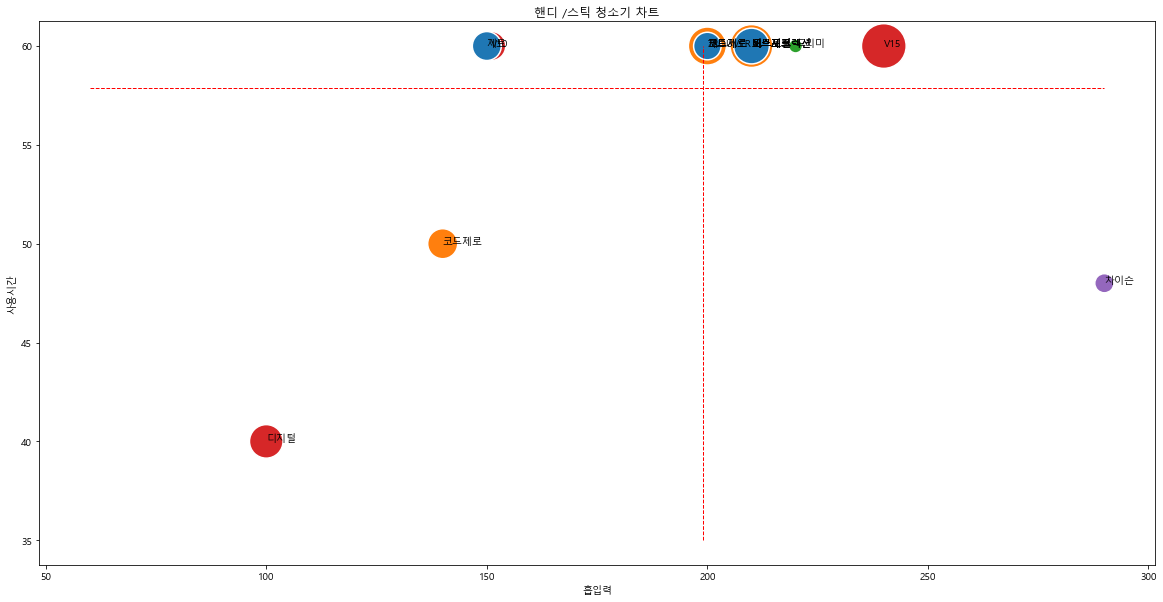

In [300]:
plt.figure(figsize= (20,10))
# 산점도 
sns.scatterplot(data = chart_data_selected,
               x = '흡입력',
               y = '사용시간',
               size = '가격', # 점크기 옵션에 변수 추가 
               hue = '회사명',
               sizes = (100, 2000), # 사이즈 크기 범위 
               legend = False)   # 회사 종류 너무 많음

# 기준선 표시 X, Y
# 사용시간 평균 선 
plt.plot([60, suction_max],[usetime_mean, usetime_mean],'r--', lw =1)
# 흡입력 평균 선 
plt.plot([suction_mean ,suction_mean],[35, usetime_max],'r--', lw =1)

# 내용 표시 
for index , row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품명'].split(' ')[0]
    plt.text(x,y,s, size = 10)

plt.title('핸디 /스틱 청소기 차트')